<span style="color:yellow; font-weight: bold; font-size: 30px;">*TASK 1:- Diamond Price Prediction:-</span>

<span style="font-weight:bold; color:purple;">Objective:</span>  
<span >The objective of this task is to predict diamond prices using features such as carat, cut, color, clarity, and others. I will use machine learning techniques to achieve this and evaluate the model’s performance on a test dataset.</span>

<span style="font-weight:bold; color:purple;">Steps:</span>

1. <span style="color:green">Load and Analyze the Data:</span>
   - I will begin by loading the Diamonds dataset, which contains information about various diamond attributes.
   - I will then analyze the dataset by:
     - Checking for missing values and determining what fraction of the data has missing values. I will decide the best way to handle them.
     - Identifying the types of variables (numerical, categorical, or text-based) and the proportion of each type in the dataset.

2. <span style="color:green;">Data Preprocessing:</span>
   - I will handle any missing values by either filling them with appropriate statistics (like the mean or median) or removing the affected rows/columns.
   - I will convert categorical variables, such as <span style="color:red;">cut</span>, <span style="color:red;">color</span>, and <span style="color:red;">clarity</span>, into numerical format using techniques like One-Hot Encoding or Label Encoding.
   - I will perform exploratory data analysis (EDA) by visualizing the data through histograms, boxplots, and correlation heatmaps to better understand the patterns and relationships within the dataset.

3. <span style="color:green;">Model Building:</span>
   - I will select a regression model to predict diamond prices. Suitable models for this task include Linear Regression, Decision Trees, Random Forest, or Gradient Boosting.
   - I will split the dataset into training and test sets. I will train the model on the training data and evaluate it using performance metrics such as RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), and R² (coefficient of determination).


In [105]:
#import the libraries
# Data handling and preprocessing
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer


Load the Dataset

In [106]:
# df=sns.load_dataset('diamonds')
# df.head()
df=pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [107]:
# Assuming your dataframe is named df
df = df.drop(columns=['Unnamed: 0'])


In [108]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<span style="font-weight:bold; color:purple;">0. Carat</span>  

Definition:
 The weight of the diamond, where 1 carat is equivalent to 200 milligrams.

Measurement: 
The carat weight affects the size and price of the diamond.

Importance:
 Larger diamonds are rarer and more valuable, so carat weight is a key determinant in a diamond's price.

<span style="font-weight:bold; color:purple;">1. Cut</span>  

Definition:
 The quality of the cut of the diamond, which affects how well the diamond reflects light. It can range from "Fair" to "Ideal."

Categories:
 Fair, Good, Very Good, Premium, Ideal

Importance:
 The cut impacts the overall appearance and value of the diamond. A better cut enhances the diamond's sparkle and brilliance.

<span style="font-weight:bold; color:purple;">2. Color</span>  

Definition:
 The color of the diamond, which refers to how colorless a diamond is. The less color, the higher the value.

Categories:
 Diamonds are graded from D (colorless) to J (light yellow or brown).

Importance:
 Color is a significant factor in determining the quality of a diamond, with colorless diamonds being more valuable.

<span style="font-weight:bold; color:purple;">3. Clarity</span>  

Definition:
 The clarity of a diamond refers to the presence of internal or external flaws (inclusions or blemishes).

Categories:
 Flawless (FL), Internally Flawless (IF), Very, Very Slightly Included (VVS1, VVS2), Very Slightly Included (VS1, VS2), Slightly Included (SI1, SI2), Included (I1, I2, I3)

Importance: 
Clarity affects the diamond's value and aesthetic appeal. Higher clarity diamonds have fewer imperfections and are more valuable.

<span style="font-weight:bold; color:purple;">4. Depth</span>  
Definition:
 The depth of the diamond, calculated as the height (from the table to the culet) divided by the average diameter of the diamond.

Measurement:
 Typically measured in percentage.

Importance:
 A deeper or shallower diamond can affect its brilliance and appearance. The ideal depth percentage is typically between 59% and 62%.

<span style="font-weight:bold; color:purple;">5. Table</span>  

Definition:
 The size of the top facet of the diamond (table), expressed as a percentage of the diameter of the diamond.

Measurement:
 The table is the flat surface of the diamond, and its size influences the diamond's appearance.

Importance:
 The table percentage plays a role in the diamond's brilliance. A table that's too large or too small can affect how light is reflected inside the diamond.

<span style="font-weight:bold; color:purple;">6. Price</span>  

Definition:
 The retail price of the diamond.

Measurement:
 The price is usually given in terms of currency (e.g., dollars).

Importance: 
The price depends on various factors such as cut, color, clarity, carat weight, and market demand. It is one of the primary factors when selecting a diamond.

<span style="font-weight:bold; color:purple;">7. X</span>  

Definition: 
The length of the diamond in millimeters.

Measurement:
 Measured along the horizontal axis of the diamond.

Importance:
 The length of the diamond is one of the dimensions used to calculate its volume and weight.

<span style="font-weight:bold; color:purple;">8. Y</span>  

Definition:
 The width of the diamond in millimeters.

Measurement:
 Measured along the horizontal axis of the diamond, perpendicular to the length.

Importance: 
Like the length, the width of the diamond plays a role in calculating its overall size and carat weight.

<span style="font-weight:bold; color:purple;">9. Z</span>  

Definition:
 The depth of the diamond in millimeters (from the top to the bottom).

Measurement:
 Measured vertically from the table to the culet.

Importance: 
The depth, along with the length and width, determines the overall proportions and symmetry of the diamond.



<span style="font-weight:bold; color:pink;">WE wll check the data type of diffrent types</span>  

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


<span style="font-weight:bold; color:pink;">Shape of the Dataframe</span>  

In [110]:
df.shape

(53940, 10)

In [111]:
df=df.drop_duplicates()

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB



<span style="font-weight:bold; color:pink;">Now we will explore Each column</span>

In [113]:
df['carat'].value_counts()

carat
0.30    2596
1.01    2240
0.31    2238
0.70    1981
0.32    1827
        ... 
3.50       1
2.70       1
3.40       1
4.00       1
3.67       1
Name: count, Length: 273, dtype: int64

<Axes: xlabel='carat', ylabel='Count'>

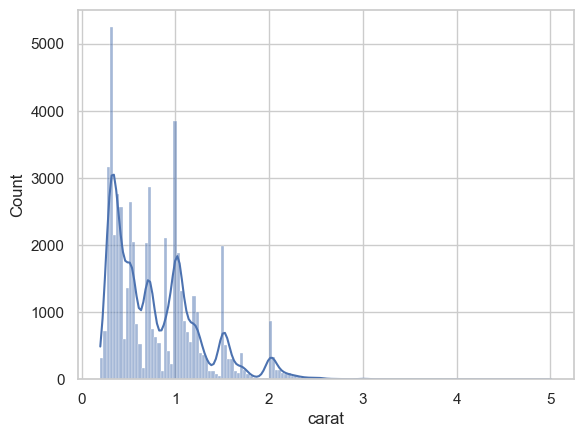

In [114]:
sns.histplot(df['carat'],kde=True)

In [115]:
df['cut'].value_counts()

cut
Ideal        21488
Premium      13748
Very Good    12069
Good          4891
Fair          1598
Name: count, dtype: int64

In [116]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [117]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

<Axes: xlabel='cut', ylabel='count'>

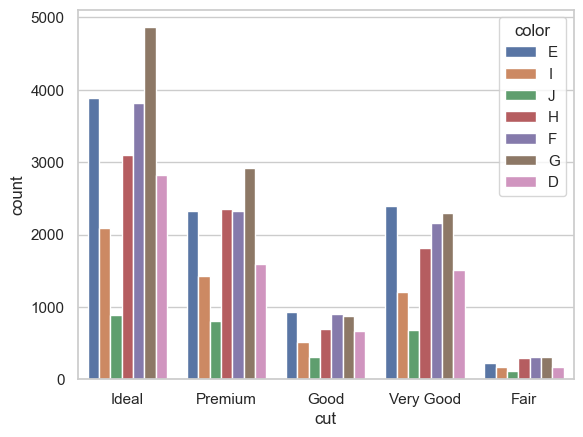

In [118]:
sns.countplot(data=df,x='cut',hue='color')

In [119]:
df['clarity'].value_counts()

clarity
SI1     13032
VS2     12229
SI2      9150
VS1      8156
VVS2     5056
VVS1     3647
IF       1784
I1        740
Name: count, dtype: int64

<span style="color:pink; font-weight: bold; font-size: 25px;">Handling the Missing value</span>

In [120]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [121]:
df.isnull().mean()

carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
price      0.0
x          0.0
y          0.0
z          0.0
dtype: float64


<span style="font-weight:bold; color:pink;">There is no missing value in diamond Dataset.</span>

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [123]:
numeric_cols=['carat','depth','price','x','y','z']

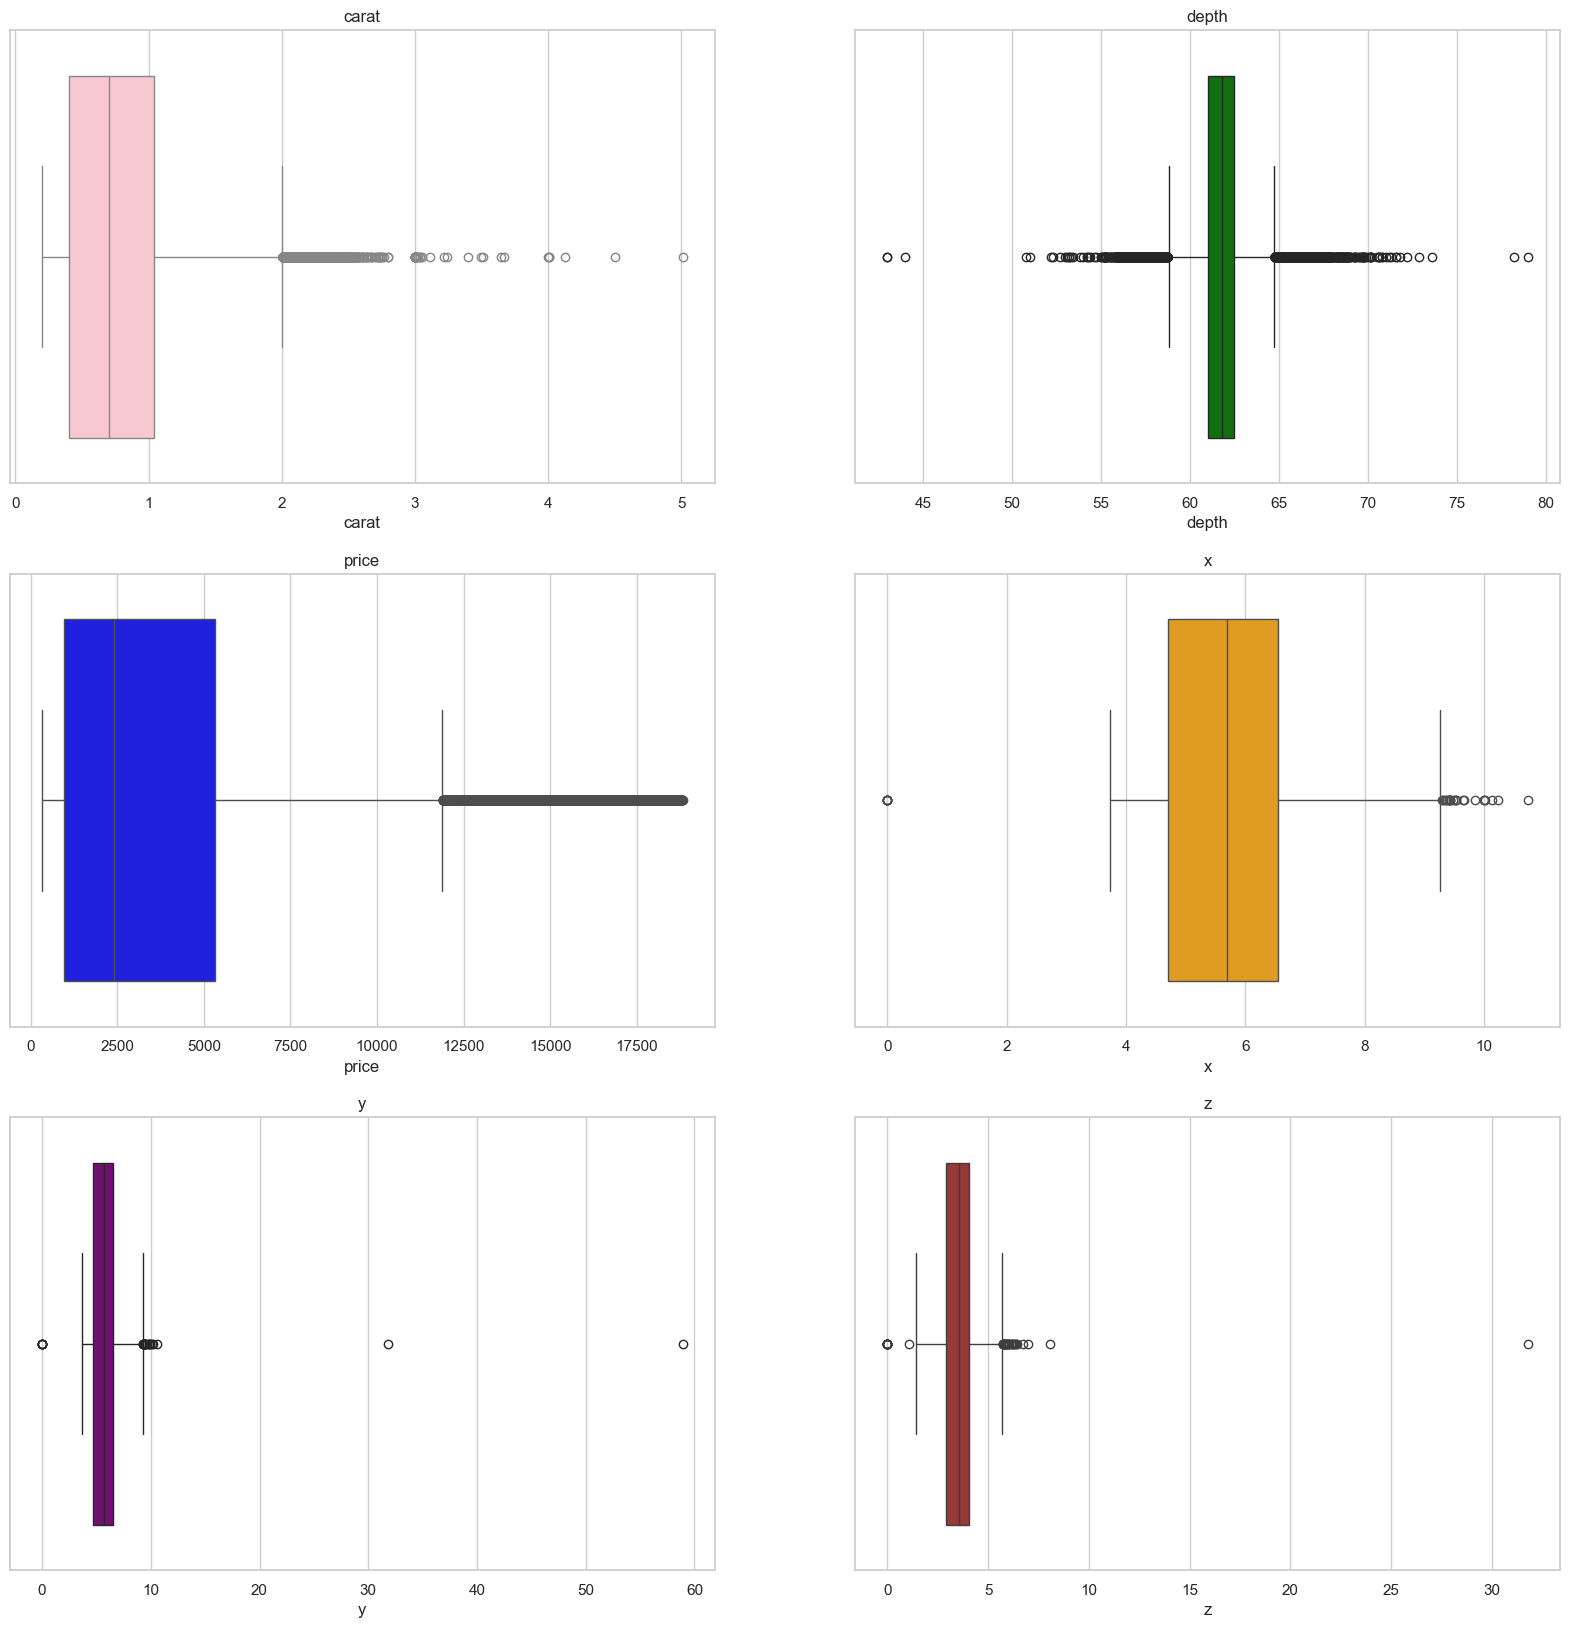

In [124]:
plt.figure(figsize=(20,20))

colors=['pink','green','blue','orange','purple','brown']

for i, col in enumerate(numeric_cols):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=df[col],color=colors[i])
    plt.title(col)

plt.show()    

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB



<span style="font-weight:bold; color:pink;">Removing Invalid Data:-
Diamonds with x, y, or z dimensions equal to 0 are removed. A diamond cannot have a 0-length dimension, so these rows are invalid i.e likely a data entry errors.</span>

In [126]:
df = df[(df["x"] > 0 ) & (df["y"] > 0) & (df["z"] > 0)]

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53775 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53775 non-null  float64
 1   cut      53775 non-null  object 
 2   color    53775 non-null  object 
 3   clarity  53775 non-null  object 
 4   depth    53775 non-null  float64
 5   table    53775 non-null  float64
 6   price    53775 non-null  int64  
 7   x        53775 non-null  float64
 8   y        53775 non-null  float64
 9   z        53775 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB



<span style="font-weight:bold; color:pink;">Handing Outlier Using IQR</span>

In [128]:
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

In [129]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [130]:
lower_bound = lower_bound.reindex(numeric_cols, fill_value=0)
upper_bound = upper_bound.reindex(numeric_cols, fill_value=float("inf"))

In [131]:
df = df[~((df[lower_bound.index] < lower_bound) | (df[upper_bound.index] > upper_bound)).any(axis=1)]

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47766 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    47766 non-null  float64
 1   cut      47766 non-null  object 
 2   color    47766 non-null  object 
 3   clarity  47766 non-null  object 
 4   depth    47766 non-null  float64
 5   table    47766 non-null  float64
 6   price    47766 non-null  int64  
 7   x        47766 non-null  float64
 8   y        47766 non-null  float64
 9   z        47766 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.0+ MB


In [133]:
sns.set(style="whitegrid")

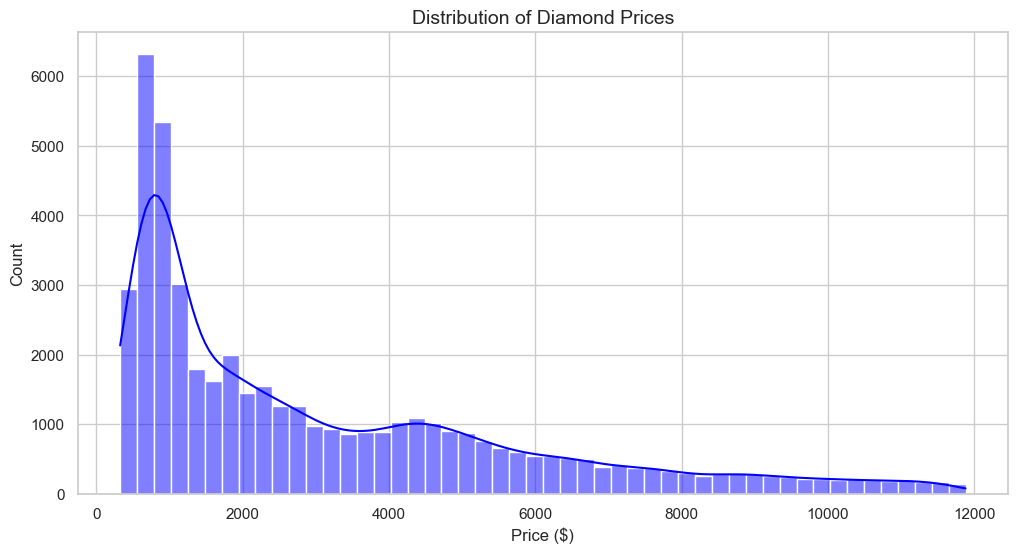

In [134]:
plt.figure(figsize=(12, 6))
sns.histplot(df["price"], bins=50, kde=True, color="blue")
plt.title("Distribution of Diamond Prices", fontsize=14)
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.show()

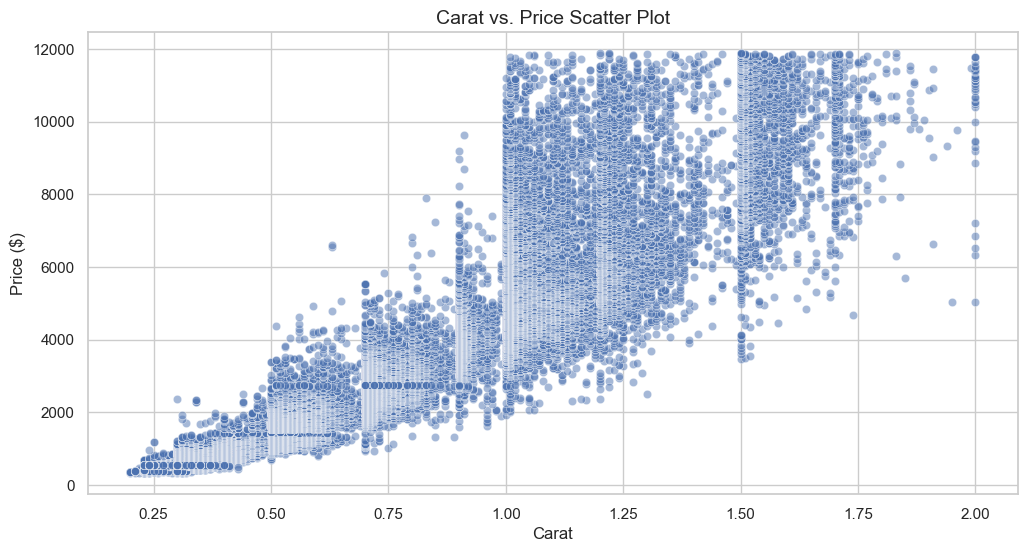

In [135]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df["carat"], y=df["price"], alpha=0.5)
plt.title("Carat vs. Price Scatter Plot", fontsize=14)
plt.xlabel("Carat")
plt.ylabel("Price ($)")
plt.show()


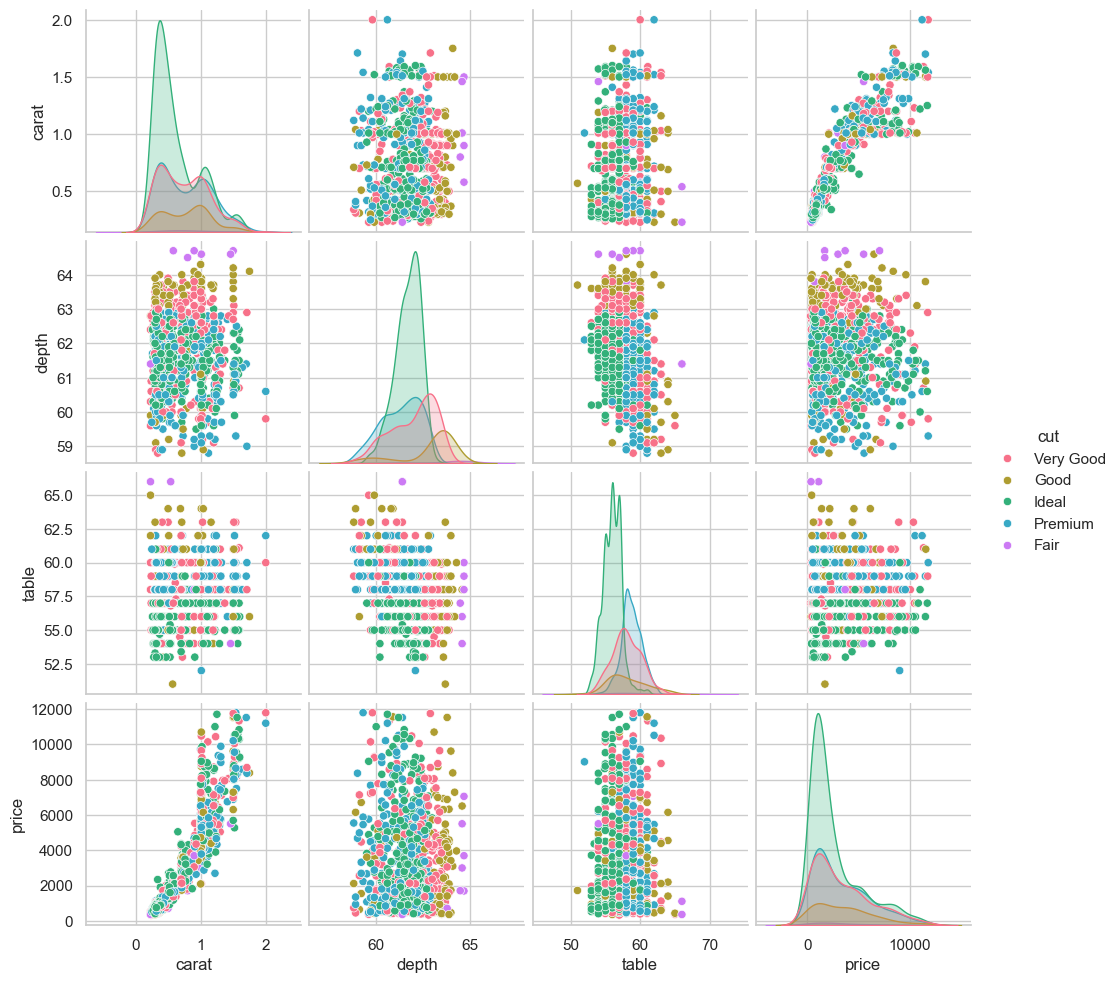

In [136]:
df_sample = df.sample(min(1000, len(df)), random_state=42)  # Ensure reproducibility / Tekrarlanabilirlik için sabit seed kullan
sns.pairplot(df_sample, vars=["carat", "depth", "table", "price"], hue="cut", palette="husl")
plt.show()


<span style="font-weight:bold; color:pink;">#Checking the fraction of numerical cols and categorical columns</span>

In [137]:
numeric_vars = df.select_dtypes(include=['float64', 'int64']).columns
categorical_vars = df.select_dtypes(include=['category']).columns
print("\nNumeric Variables:", numeric_vars)
print("\nCategorical Variables:", categorical_vars)

# Fraction of numerical, categorical variables
numeric_fraction = len(numeric_vars) / df.shape[1]
categorical_fraction = len(categorical_vars) / df.shape[1]
print("\nFraction of numerical variables:", numeric_fraction)
print("Fraction of categorical variables:", categorical_fraction)


Numeric Variables: Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

Categorical Variables: Index([], dtype='object')

Fraction of numerical variables: 0.7
Fraction of categorical variables: 0.0


In [138]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns
categorical_vars = ['cut', 'color', 'clarity']

# Apply Label Encoding
for col in categorical_vars:
    df[col] = label_encoder.fit_transform(df[col])

print(df)

       carat  cut  color  clarity  depth  table  price     x     y     z
0       0.23    2      1        3   61.5   55.0    326  3.95  3.98  2.43
1       0.21    3      1        2   59.8   61.0    326  3.89  3.84  2.31
3       0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
4       0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75
5       0.24    4      6        7   62.8   57.0    336  3.94  3.96  2.48
...      ...  ...    ...      ...    ...    ...    ...   ...   ...   ...
53935   0.72    2      0        2   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72    1      0        2   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70    4      0        2   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    3      4        3   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75    2      0        3   62.2   55.0   2757  5.83  5.87  3.64

[47766 rows x 10 columns]


In [139]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'df' is your DataFrame with the features you want to scale
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

# Convert back to DataFrame and rename to 'df'
df = pd.DataFrame(scaled_features, columns=df.columns)


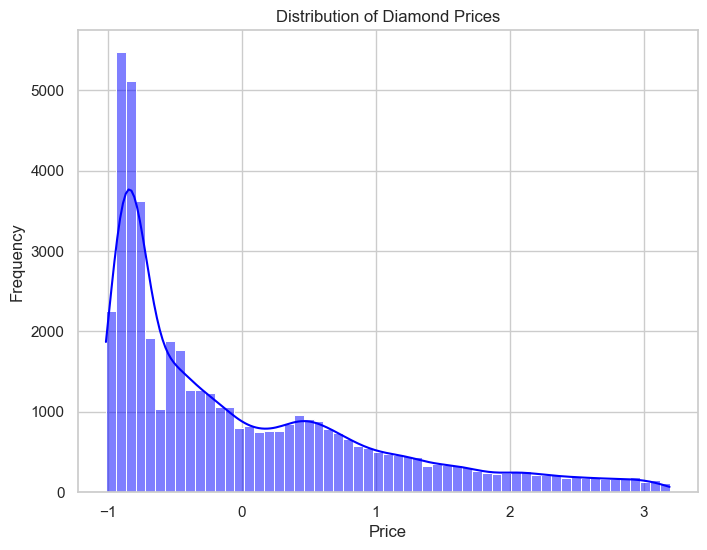

In [140]:
# Price distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True, color='blue')
plt.title("Distribution of Diamond Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()



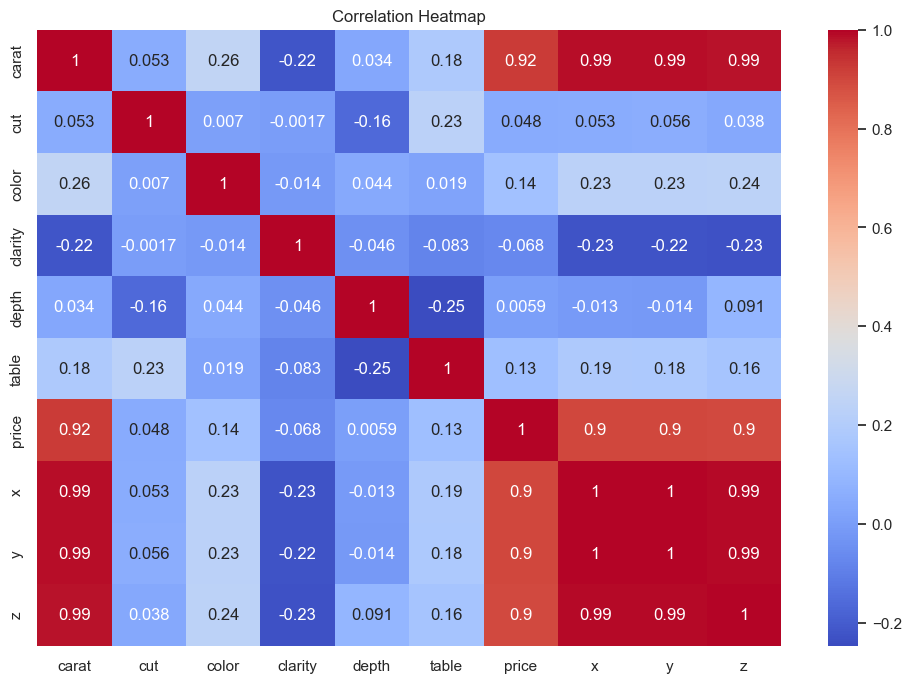

In [141]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

<h2><span style="font-weight:bold; color:yellow; font_size=30px">Analysis of the Heatmap</span></h2>

1.The price of a diamond is mostly influenced by carat size and physical dimensions (x, y, z).

2.Quality factors like cut, color, and clarity have a minimal direct correlation with price.

3.Size-related features (x, y, z) are very tightly interrelated, which could indicate multicollinearity if you're using them in a regression model.

<h2><span style="font-weight:bold; color:yellow; font_size=30px">Feautre Selection on the basis of correlation matrix</span></h2>

#Since x, y, and z are almost perfectly correlated with each other and carat, I can:
Keep only carat as it’s strongly correlated with price and also captures the size effect.
Drop x, y, and z to avoid redundancy.

In [142]:
# Defining features (X) and target (y)
X = df.drop(['price', 'x', 'y', 'z'], axis=1)  # Dropping highly correlated features
y = df['price']


<h1><span style="font-weight:bold; color:pink; font-size=30px">MACHINE LEARNING MODEL</span></h1>

In [143]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



<span style="font-weight:bold; color:pink;">Using Linear Regression</span>

In [144]:

# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.11929904418460553
R-squared: 0.8820638431030892


<span style="font-weight:bold; color:pink;">USING RANDOM FOREST REGRESSOR</span>

In [145]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.018395075618807467
R-squared: 0.9818150720390251


<span style="font-weight:bold; color:pink;">USING XGBoost Regressor</span>

In [146]:
import xgboost as xgb
model = xgb.XGBRegressor(
    n_estimators=100,  # Number of trees
    learning_rate=0.1,  # Step size
    max_depth=6,  # Tree depth
    subsample=0.8,  # Randomly select fraction of data
    colsample_bytree=0.8,  # Fraction of features used per tree
    random_state=42
)

# Training the model
model.fit(X_train, y_train)

# prediction
y_pred = model.predict(X_test)

# performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# printing the result
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.017417981626429352
R-squared: 0.9827810035867232
